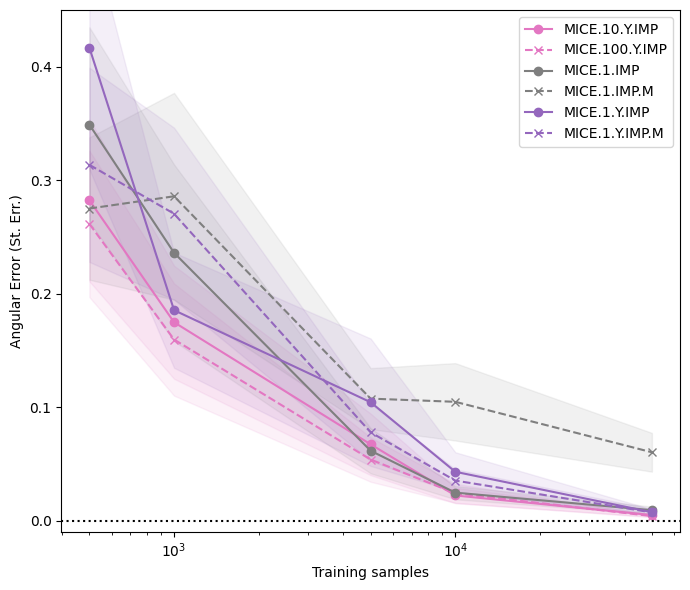

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from utils import *
from setups import uncertainties, methods_config, methods_no_beta_estimate, metrics_config, variable_config, uncertainties_config


exp = "ExpA"

simulation_set_up = pd.read_csv(os.path.join("data", exp, "simulation_set_up.csv"))


def plot_beta_scores_subplots(
        
        data,

        metric = "angular_error",
        variable = "corr",
        uncertainty = "se",

        log_x = True,
        log_y = False,
        min_y = -0.01,
        max_y = 1.01,

        select_methods = None,
        remove_methods = None,
        save = None,

        size_height=5,
        size_width=5,

        ##

        **kwargs
):
    
    df = filter_data(data, **kwargs)
    df = df[[metric, variable, "method", "n_train"]]
    df.loc[:,metric] = df.loc[:,metric].astype(float)
    df = df.groupby(["method", variable, "n_train"]).agg({metric: ["mean", uncertainties[uncertainty]]}).reset_index()
    df.columns = ["method", variable, "n_train", "mean", uncertainty]

    methods = df["method"].unique()
    if select_methods is not None:
        methods = [m for m in methods if m in select_methods]
    if remove_methods is not None:
        methods = [m for m in methods if m not in remove_methods]

    variables = df[variable].unique()

    fig, axs = plt.subplots(1, len(variables), figsize=(size_width*len(variables), size_height))
    if len(variables) == 1:
        axs = [axs]

    for i, var in enumerate(variables):

        ax = axs[i]

        for method in methods:
            if method in methods_no_beta_estimate and metric !="running_time":
                continue

            df_ = df[(df["method"] == method) & (df[variable] == var)]
            x = df_["n_train"]
            y = df_["mean"]
            yerr = df_[uncertainty]

            ax.plot(x, y, label=methods_config[method]["label"],
                     color=methods_config[method]["color"], 
                     marker=methods_config[method]["marker"],
                     linestyle=methods_config[method]["linestyle"])
            ax.fill_between(x, y - yerr, y + yerr, color=methods_config[method]["color"], alpha=0.1)

        if variable != "d":
            ax.set_title(f"{variable_config[variable]['label']} = {var}")
        
        ax.axhline(0, color="black", linestyle=":")
        ax.set_xlabel("Training samples")
        ax.set_ylabel(f"{metrics_config[metric]['label']} ({uncertainties_config[uncertainty]['label']})")
        ax.set_ylim(min_y, max_y)
        if i == 0:
            ax.legend()

        if log_x:
            ax.set_xscale("log")
        if log_y:
            ax.set_yscale("log")


    plt.tight_layout()
    if save is not None:
        plt.savefig(save)

    plt.show()


# remove_methods=["MICE.IMP", "MICE.M.IMP",  "MICE.M.IMP", "05.IMP.M", "MICE.Y.M.IMP"]
remove_methods = None
# select_methods = None
# select_methods= ["05.IMP", "05.IMP.M", "Mean.IMP", "Mean.IMP.M", "PbP", "CC", "MICE.IMP", "MICE.M.IMP", "MICE.Y.IMP", "MICE.Y.M.IMP", "MICE.10.Y.IMP", "MICE.100.Y.IMP", "SAEM"]
select_methods= ["MICE.IMP", "MICE.M.IMP",  "MICE.M.IMP", "MICE.Y.M.IMP", "MICE.Y.IMP", "MICE.10.Y.IMP", "MICE.100.Y.IMP"]


metric = "angular_error"


plot_beta_scores_subplots(
    simulation_set_up,
    metric = metric,
    variable="d",

    max_y=0.45,
    min_y =-0.01,

    remove_methods=remove_methods,
    select_methods=select_methods,

    size_height=6,
    size_width=7,

    # save="data/ExpA/figures/angular_MICE.pdf",

)


In [2]:
temp = simulation_set_up.groupby(["method","n_train"]).agg({"running_time": ["mean","count"]})
temp = temp.reset_index()
# method not in "remove_methods"
temp = temp[temp["method"].isin(select_methods)]
print(temp[:50])

            method  n_train running_time      
                                    mean count
0           05.IMP    500.0     0.024336    36
1           05.IMP   1000.0     0.013040    36
2           05.IMP   5000.0     0.018886    36
3           05.IMP  10000.0     0.027667    36
4           05.IMP  50000.0     0.103207    36
5         05.IMP.M    500.0     0.044082    36
6         05.IMP.M   1000.0     0.025123    36
7         05.IMP.M   5000.0     0.033899    36
8         05.IMP.M  10000.0     0.039759    36
9         05.IMP.M  50000.0     1.129425    36
10              CC    500.0     0.039000    36
11              CC   1000.0     0.018751    36
12              CC   5000.0     0.025073    36
13              CC  10000.0     0.035509    36
14              CC  50000.0     0.170922    36
35   MICE.10.Y.IMP    500.0     4.591801    36
36   MICE.10.Y.IMP   1000.0     4.730468    36
37   MICE.10.Y.IMP   5000.0     7.465756    36
38   MICE.10.Y.IMP  10000.0    10.137526    36
39   MICE.10.